Question 1: Extracting Tesla Stock Data Using yfinance


In [25]:
import yfinance as yf
import pandas as pd

# Extract Tesla data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


Extracting Tesla Revenue Data Using Webscraping


In [20]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
soup = BeautifulSoup(response.content, "html.parser")

# Locate the financial data table
table = soup.find_all('tbody')[1]  # Assuming the second table body contains the data

# Initialize lists to hold data
dates = []
revenues = []

for row in table.find_all('tr'):
    # Extract date and revenue values
    cols = row.find_all('td')
    date = cols[0].text.strip()
    revenue = cols[1].text.strip().replace('$', '').replace(',', '')  # Clean up the revenue string
    
    dates.append(date)
    try:
        revenues.append(float(revenue))
    except ValueError:
        revenues.append(None)  # Append None if revenue is not a valid float

# Create a DataFrame
tesla_revenue = pd.DataFrame({
    "Date": dates,
    "Revenue": revenues
})

# Display the last five rows
print(tesla_revenue.tail())


          Date  Revenue
56  2010-06-30     28.0
57  2010-03-31     21.0
58  2009-12-31      NaN
59  2009-09-30     46.0
60  2009-06-30     27.0


Use yfinance to Extract Stock Data

In [21]:
import yfinance as yf
import pandas as pd

# Extract data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


Extract GME Revenue Data

In [22]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
soup = BeautifulSoup(response.content, "html.parser")

# Locate the financial data table
table = soup.find_all('tbody')[1]  # Assuming the second table body contains the data

# Initialize lists to hold data
dates = []
revenues = []

for row in table.find_all('tr'):
    # Extract date and revenue values
    cols = row.find_all('td')
    date = cols[0].text.strip()
    revenue = cols[1].text.strip().replace('$', '').replace(',', '')  # Clean up the revenue string
    
    dates.append(date)
    try:
        revenues.append(float(revenue))
    except ValueError:
        revenues.append(None)  # Append None if revenue is not a valid float

# Create a DataFrame
gme_revenue = pd.DataFrame({
    "Date": dates,
    "Revenue": revenues
})

# Display the last five rows
print(gme_revenue.tail())


          Date  Revenue
58  2010-01-31   3524.0
59  2009-10-31   1835.0
60  2009-07-31   1739.0
61  2009-04-30   1981.0
62  2009-01-31   3492.0


Plot Tesla Stock Graph

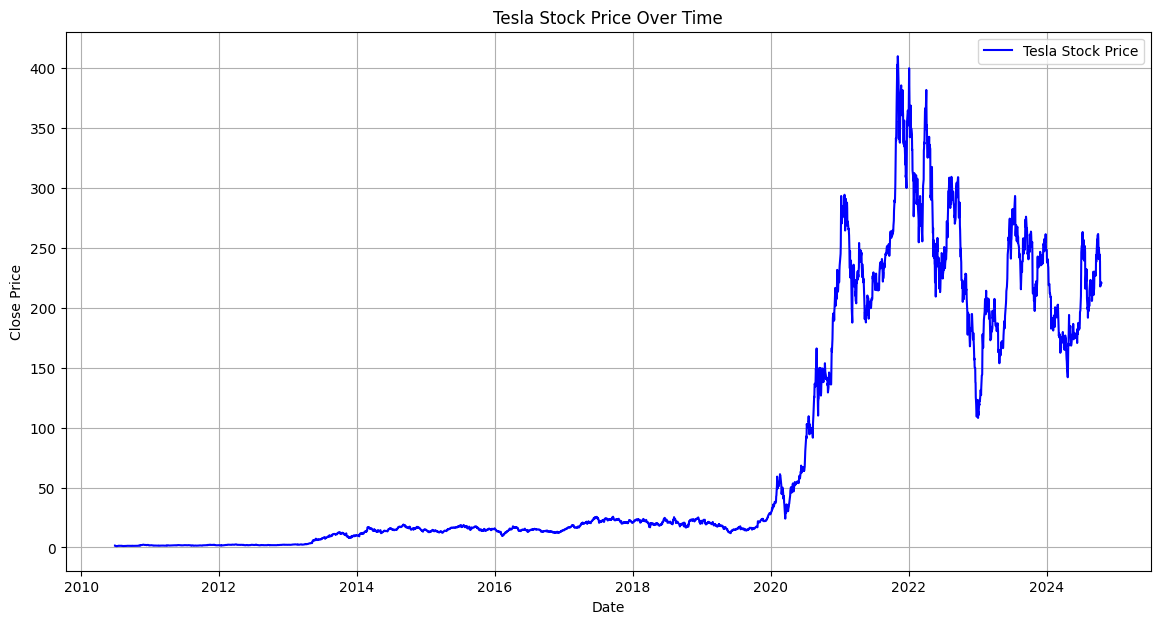

In [23]:
import matplotlib.pyplot as plt

def make_graph(stock_data, title):
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Tesla Stock Price', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming you have already extracted Tesla stock data as tesla_data
tesla_data = yf.Ticker("TSLA").history(period="max")
tesla_data.reset_index(inplace=True)

make_graph(tesla_data, "Tesla Stock Price Over Time")


Plot GameStop Stock Graph

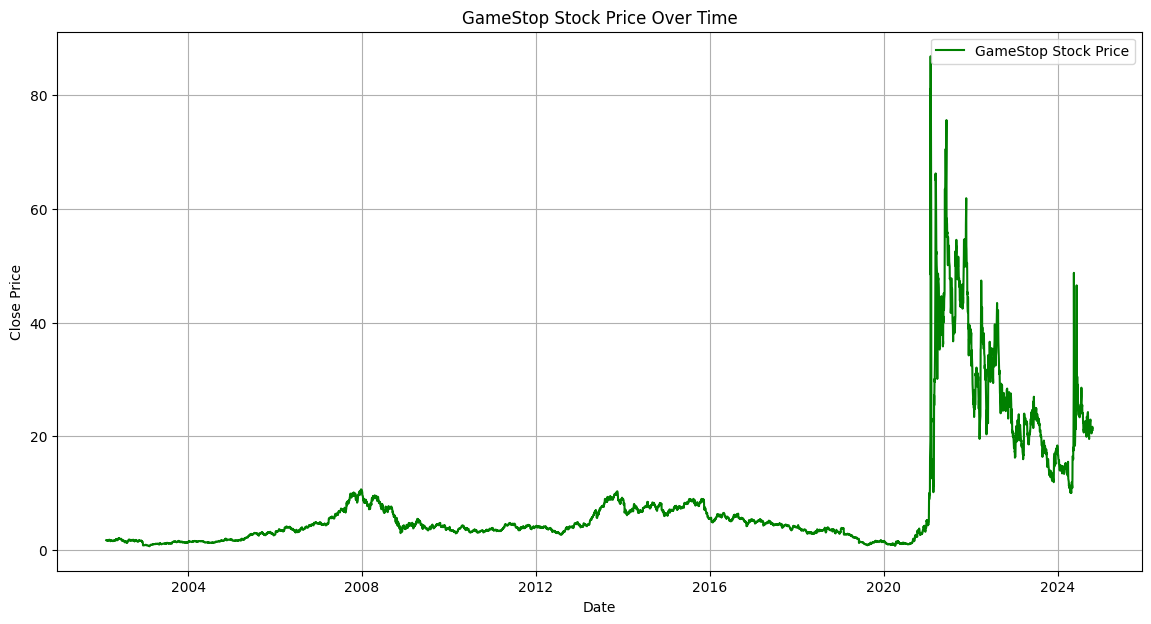

In [24]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def make_graph(stock_data, title):
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['Date'], stock_data['Close'], label='GameStop Stock Price', color='green')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Extract data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Plot the graph
make_graph(gme_data, "GameStop Stock Price Over Time")
